<a href="https://colab.research.google.com/github/akshaya-siva/DS---2/blob/backend/Hackathon_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🔍 Dataset Overview:
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0      

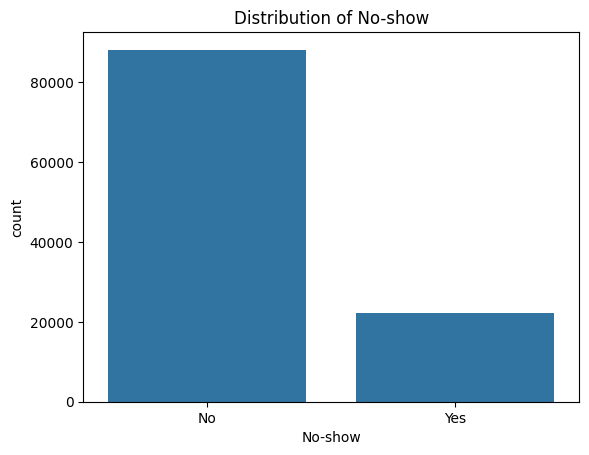

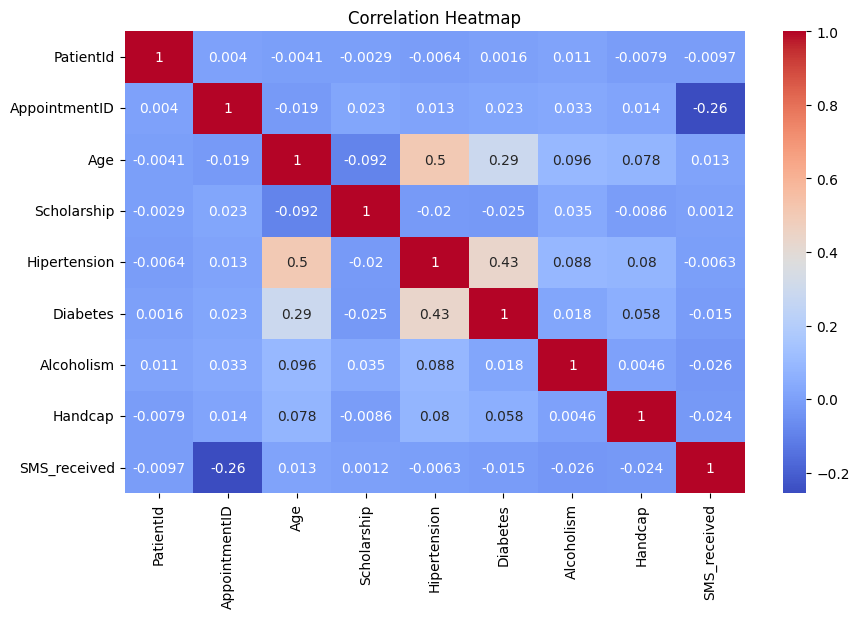

<ipython-input-3-c7fd1bafd744>:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['No-show'] = df['No-show'].replace({'yes': 1, 'no': 0})



🔍 Overlapping rows between train and test sets: 211

📊 Class distribution:
Full dataset: No-show
0    0.798067
1    0.201933
Name: proportion, dtype: float64
Train set: No-show
0    0.798068
1    0.201932
Name: proportion, dtype: float64
Test set: No-show
0    0.798064
1    0.201936
Name: proportion, dtype: float64


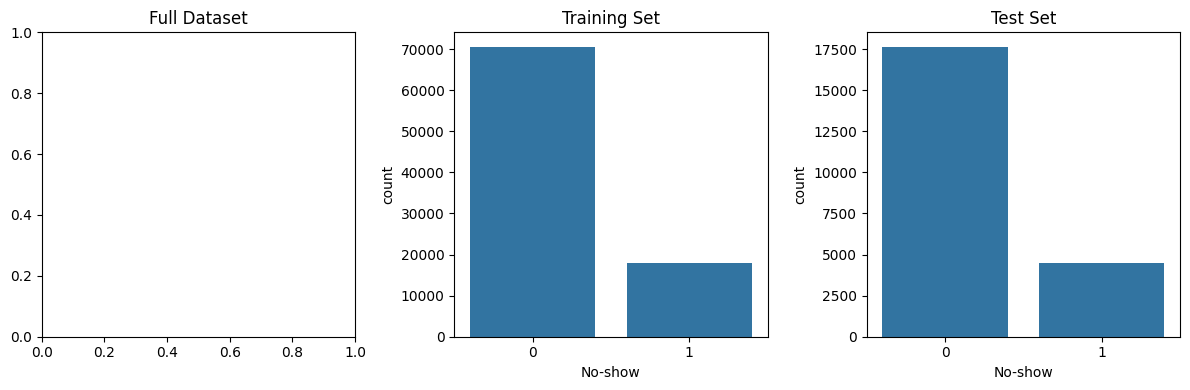

In [ ]:
# 📘 Hackathon Notebook: Medical No-Show Appointments - Data Preparation

# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Step 2: Load Dataset
df = pd.read_csv("KaggleV2-May-2016.csv")  # Replace with actual file path

# ✅ Step 3: Exploratory Data Analysis (EDA)
print("\n🔍 Dataset Overview:")
print(df.head())
print("\n📏 Shape of dataset:", df.shape)
print("\n🧼 Missing values:")
print(df.isnull().sum())
print("\n🔢 Data types:")
print(df.dtypes)

# Distribution of target variable
sns.countplot(x='No-show', data=df)
plt.title("Distribution of No-show")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ✅ Step 4: Clean 'No-show' Column
# Normalize formatting
df['No-show'] = df['No-show'].astype(str).str.strip().str.lower()

# Convert to binary labels
df['No-show'] = df['No-show'].replace({'yes': 1, 'no': 0})

# Drop rows where conversion failed (if any)
df = df[df['No-show'].notnull()]

# ✅ Step 5: Drop Unnecessary Columns
cols_to_drop = ['PatientId', 'AppointmentID']
df = df.drop(cols_to_drop, axis=1, errors='ignore')

# ✅ Step 6: Train-Test Split (Stratified 80/20)
X = df.drop('No-show', axis=1)
y = df['No-show']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# ✅ Step 7: Save Outputs
# Full cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)
df.to_pickle("cleaned_dataset.pkl")

# Training and testing sets
train_df = X_train.copy()
train_df['No-show'] = y_train
train_df.to_csv("train_data.csv", index=False)

test_df = X_test.copy()
test_df['No-show'] = y_test
test_df.to_csv("test_data.csv", index=False)

# ✅ Step 8: Data Validation
# 1. Check for data leakage
overlap = pd.merge(X_train, X_test, how='inner')
print("\n🔍 Overlapping rows between train and test sets:", len(overlap))

# 2. Class balance check
print("\n📊 Class distribution:")
print("Full dataset:", y.value_counts(normalize=True))
print("Train set:", y_train.value_counts(normalize=True))
print("Test set:", y_test.value_counts(normalize=True))

# ✅ Step 9: (Optional) Visualize Class Balance
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Full Dataset")

plt.subplot(1, 3, 2)
sns.countplot(x=y_train)
plt.title("Training Set")

plt.subplot(1, 3, 3)
sns.countplot(x=y_test)
plt.title("Test Set")

plt.tight_layout()
plt.show()


In [ ]:
!pip install catboost


  Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y catboost numpy
!pip install numpy==1.23.5
!pip install catboost


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 60.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.7/98.7 MB 119.8 MB/s eta 0:00:01^C


In [ ]:
# prompt: Train Five Classification Models:
# Train each of the following models using the training dataset:
# Logistic Regression: A simple and interpretable baseline model.
# Decision Trees: A non-linear model that can capture interactions between features.
# Random Forest: An ensemble method that improves prediction accuracy by
# combining multiple decision trees.
# Support Vector Machine SVM: A robust classifier, especially effective for smaller
# datasets or linearly separable data.
# Gradient Boosting: A powerful ensemble technique for handling complex
# relationships in data.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the training data
train_df = pd.read_csv("train_data.csv")
X_train = train_df.drop('No-show', axis=1)
y_train = train_df['No-show']

# Load the testing data
test_df = pd.read_csv("test_data.csv")
X_test = test_df.drop('No-show', axis=1)
y_test = test_df['No-show']

# Preprocessing (if needed): Convert categorical features to numerical using one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


# Align columns in case of mismatches
X_train, X_test = X_train.align(X_test, join='inner', axis=1)


# Train and evaluate models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Increased max_iter
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),  # Set verbose to 0 to suppress output
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        "accuracy": accuracy,
        "classification_report": classification_report(y_test, y_pred)
    }
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-"*40)

# Print overall results (optional)
print("Overall Results:")
for name, result in results.items():
    print(f"{name}: Accuracy = {result['accuracy']}")


Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8002804668415815
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.78      0.02      0.03      4464

    accuracy                           0.80     22106
   macro avg       0.79      0.51      0.46     22106
weighted avg       0.80      0.80      0.72     22106

----------------------------------------
Training Decision Tree...
Decision Tree Accuracy: 0.7198498145299919
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83     17642
           1       0.28      0.24      0.25      4464

    accuracy                           0.72     22106
   macro avg       0.54      0.54      0.54     22106
weighted avg       0.70      0.72      0.71     22106

----------------------------------------
Training Random Forest...
Random Forest Accuracy: 0.75278205012213

In [ ]:
# prompt: Save each above trained model to disk using libraries like  pickle for later evaluation.

import pickle

# Save trained models to disk using pickle
for name, model in models.items():
    filename = f"{name.lower().replace(' ', '_')}_model.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Saved {name} model to {filename}")


Saved Logistic Regression model to logistic_regression_model.pkl
Saved Decision Tree model to decision_tree_model.pkl
Saved Random Forest model to random_forest_model.pkl
Saved CatBoost model to catboost_model.pkl
Saved Gradient Boosting model to gradient_boosting_model.pkl


In [ ]:
# prompt: For Hyper-Parameter Tuning, Use Grid Search technique to find optimal hyper-parameters for  Logistic Regression model.
#    -  Use Smaller Hyperparameter Grids, Use cv=3 (Cross-validation folds), Use RandomizedSearchCV Instead of GridSearchCV,
#     - Tracking how performance metrics change with different hyper-parameters.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter grid for Logistic Regression
param_dist = {
    'C': uniform(loc=0.1, scale=10),  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solvers compatible with L1 and L2 penalties
}

# Initialize Logistic Regression model
logreg_model = LogisticRegression(class_weight='balanced',max_iter=1000)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(logreg_model,
                                   param_distributions=param_dist,
                                   n_iter=5,  # Number of parameter settings sampled
                                   cv=3,
                                   random_state=42,
                                   scoring='f1_macro')


# Perform hyperparameter search
random_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


# Evaluate the best model on the test set
best_logreg_model = random_search.best_estimator_
y_pred = best_logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of best model: {accuracy}")

# Track performance changes (example)
results = pd.DataFrame(random_search.cv_results_)
print(results[['param_C', 'param_penalty', 'param_solver', 'mean_test_score', 'rank_test_score']])


Best Hyperparameters: {'C': 3.845401188473625, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.5344029622093073
Test Accuracy of best model: 0.5923278747851262
    param_C param_penalty param_solver  mean_test_score  rank_test_score
0  3.845401            l1    liblinear         0.534403                1
1  7.419939            l1    liblinear         0.533391                3
2  1.660186            l1    liblinear         0.533620                2
3  0.680836            l2    liblinear         0.531397                5
4  6.111150            l2    liblinear         0.533000                4


In [ ]:
# prompt: For Hyper-Parameter Tuning, Use Grid Search technique to find optimal hyper-parameters for Decision Tree model.
#    -  Use Smaller Hyperparameter Grids, Use cv=3 (Cross-validation folds), Use RandomizedSearchCV Instead of GridSearchCV,
#     - Tracking how performance metrics change with different hyper-parameters.

# Define the parameter grid for Decision Tree
param_dist_dt = {
    'max_depth': randint(2, 10),  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum samples required to split an internal node
    'min_samples_leaf': randint(1, 10)  # Minimum samples required to be at a leaf node
}

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Initialize RandomizedSearchCV for Decision Tree
random_search_dt = RandomizedSearchCV(dt_model,
                                      param_distributions=param_dist_dt,
                                      n_iter=5,  # Number of parameter settings sampled
                                      cv=3,
                                      random_state=42,
                                      scoring='f1_macro')

# Perform hyperparameter search for Decision Tree
random_search_dt.fit(X_train, y_train)

# Print the best hyperparameters and accuracy for Decision Tree
print("\nDecision Tree Best Hyperparameters:", random_search_dt.best_params_)
print("Decision Tree Best Accuracy:", random_search_dt.best_score_)

# Evaluate the best Decision Tree model on the test set
best_dt_model = random_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Test Accuracy of best model: {accuracy_dt}")

# Track performance changes for Decision Tree (example)
results_dt = pd.DataFrame(random_search_dt.cv_results_)
print("\nDecision Tree Performance:")
print(results_dt[['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score', 'rank_test_score']])



Decision Tree Best Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 8}
Decision Tree Best Accuracy: 0.5672735067118956
Decision Tree Test Accuracy of best model: 0.6614041436714014

Decision Tree Performance:
   param_max_depth  param_min_samples_split  param_min_samples_leaf  \
0                8                       16                       4   
1                4                        8                       8   
2                3                       12                       3   
3                4                        5                       8   
4                9                        4                       8   

   mean_test_score  rank_test_score  
0         0.549991                4  
1         0.567274                1  
2         0.564882                3  
3         0.567274                1  
4         0.547220                5  


In [ ]:
# prompt: For Hyper-Parameter Tuning, Use Grid Search technique to find optimal hyper-parameters for Random Forest  model.
#    -  Use Smaller Hyperparameter Grids, Use cv=3 (Cross-validation folds), Use RandomizedSearchCV Instead of GridSearchCV,
#     - Tracking how performance metrics change with different hyper-parameters.

# Define the parameter grid for Random Forest
param_dist_rf = {
    'n_estimators': randint(50, 200),  # Number of trees in the forest
    'max_depth': randint(10, 50),  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum samples required to split an internal node
    'min_samples_leaf': randint(1, 10)  # Minimum samples required to be at a leaf node
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced',random_state=42)

# Initialize RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(rf_model,
                                      param_distributions=param_dist_rf,
                                      n_iter=5,  # Number of parameter settings sampled
                                      cv=3,
                                      random_state=42,
                                      scoring='f1_macro')

# Perform hyperparameter search for Random Forest
random_search_rf.fit(X_train, y_train)

# Print the best hyperparameters and accuracy for Random Forest
print("\nRandom Forest Best Hyperparameters:", random_search_rf.best_params_)
print("Random Forest Best Accuracy:", random_search_rf.best_score_)

# Evaluate the best Random Forest model on the test set
best_rf_model = random_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy of best model: {accuracy_rf}")

# Track performance changes for Random Forest (example)
results_rf = pd.DataFrame(random_search_rf.cv_results_)
print("\nRandom Forest Performance:")
print(results_rf[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score', 'rank_test_score']])



Random Forest Best Hyperparameters: {'max_depth': 48, 'min_samples_leaf': 4, 'min_samples_split': 16, 'n_estimators': 156}
Random Forest Best Accuracy: 0.5516045315666517
Random Forest Test Accuracy of best model: 0.6286980910160137

Random Forest Performance:
   param_n_estimators  param_max_depth  param_min_samples_split  \
0                 156               48                       16   
1                 171               17                        8   
2                 137               28                       12   
3                 199               45                        4   
4                  87               11                       13   

   param_min_samples_leaf  mean_test_score  rank_test_score  
0                       4         0.551605                1  
1                       5         0.551597                2  
2                       7         0.547007                4  
3                       8         0.548771                3  
4                       8

In [ ]:
# prompt: For Hyper-Parameter Tuning, Use Grid Search technique to find optimal hyper-parameters for CatBoost  model.
#    -  Use Smaller Hyperparameter Grids, Use cv=3 (Cross-validation folds), Use RandomizedSearchCV Instead of GridSearchCV,
#     - Tracking how performance metrics change with different hyper-parameters.

# Define the parameter grid for CatBoost
param_dist_cb = {
    'iterations': randint(100, 500),  # Number of boosting iterations
    'learning_rate': uniform(0.01, 0.3),  # Learning rate
    'depth': randint(4, 10),  # Depth of the trees
    'l2_leaf_reg': randint(1, 10),  # L2 regularization term
}

# Initialize CatBoost model
cb_model = CatBoostClassifier( verbose=0, random_state=42)

# Initialize RandomizedSearchCV for CatBoost
random_search_cb = RandomizedSearchCV(cb_model,
                                      param_distributions=param_dist_cb,
                                      n_iter=5,  # Number of parameter settings sampled
                                      cv=3,
                                      random_state=42,
                                      scoring='f1_macro')

# Perform hyperparameter search for CatBoost
random_search_cb.fit(X_train, y_train)

# Print the best hyperparameters and accuracy for CatBoost
print("\nCatBoost Best Hyperparameters:", random_search_cb.best_params_)
print("CatBoost Best Accuracy:", random_search_cb.best_score_)

# Evaluate the best CatBoost model on the test set
best_cb_model = random_search_cb.best_estimator_
y_pred_cb = best_cb_model.predict(X_test)
accuracy_cb = accuracy_score(y_test, y_pred_cb)
print(f"CatBoost Test Accuracy of best model: {accuracy_cb}")

# Track performance changes for CatBoost (example)
results_cb = pd.DataFrame(random_search_cb.cv_results_)
print("\nCatBoost Performance:")
print(results_cb[['param_iterations', 'param_learning_rate', 'param_depth', 'param_l2_leaf_reg', 'mean_test_score', 'rank_test_score']])



CatBoost Best Hyperparameters: {'depth': 7, 'iterations': 448, 'l2_leaf_reg': 8, 'learning_rate': 0.189597545259111}
CatBoost Best Accuracy: 0.46476102921385487
CatBoost Test Accuracy of best model: 0.8019542205735999

CatBoost Performance:
   param_iterations  param_learning_rate  param_depth  param_l2_leaf_reg  \
0               448             0.189598            7                  8   
1               314             0.110113            5                  8   
2               249             0.300973            6                  5   
3               393             0.064547            7                  2   
4               260             0.012120            8                  6   

   mean_test_score  rank_test_score  
0         0.464761                1  
1         0.455258                4  
2         0.463453                2  
3         0.455647                3  
4         0.444838                5  


In [ ]:
# prompt: For Hyper-Parameter Tuning, Use Grid Search technique to find optimal hyper-parameters for Gradient Boosting  model.
#    -  Use Smaller Hyperparameter Grids, Use cv=3 (Cross-validation folds), Use RandomizedSearchCV Instead of GridSearchCV,
#     - Tracking how performance metrics change with different hyper-parameters.


# Define the parameter grid for Gradient Boosting
param_dist_gb = {
    'n_estimators': randint(50, 200),  # Number of boosting stages
    'learning_rate': uniform(0.01, 0.3),  # Learning rate shrinks the contribution of each tree
    'max_depth': randint(3, 10),  # Maximum depth of the individual regression estimators
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10)  # Minimum number of samples required to be at a leaf node
}

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Initialize RandomizedSearchCV for Gradient Boosting
random_search_gb = RandomizedSearchCV(gb_model,
                                      param_distributions=param_dist_gb,
                                      n_iter=5,  # Number of parameter settings sampled
                                      cv=3,
                                      random_state=42,
                                      scoring='f1')

# Perform hyperparameter search for Gradient Boosting
random_search_gb.fit(X_train, y_train)

# Print the best hyperparameters and accuracy for Gradient Boosting
print("\nGradient Boosting Best Hyperparameters:", random_search_gb.best_params_)
print("Gradient Boosting Best Accuracy:", random_search_gb.best_score_)

# Evaluate the best Gradient Boosting model on the test set
best_gb_model = random_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Test Accuracy of best model: {accuracy_gb}")

# Track performance changes for Gradient Boosting (example)
results_gb = pd.DataFrame(random_search_gb.cv_results_)
print("\nGradient Boosting Performance:")
print(results_gb[['param_n_estimators', 'param_learning_rate', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score', 'rank_test_score']])



Gradient Boosting Best Hyperparameters: {'learning_rate': 0.22242177333881366, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 137}
Gradient Boosting Best Accuracy: 0.0917930717518422
Gradient Boosting Test Accuracy of best model: 0.7987424228716186

Gradient Boosting Performance:
   param_n_estimators  param_learning_rate  param_max_depth  \
0                 171             0.122362                7   
1                 153             0.056798                5   
2                 137             0.222422                8   
3                 107             0.259733                8   
4                 108             0.167427                6   

   param_min_samples_split  param_min_samples_leaf  mean_test_score  \
0                        8                       8         0.050976   
1                        5                       8         0.016238   
2                        3                       5         0.091793   
3                      

In [ ]:
# prompt: Save each above tuned model to disk using libraries like pickle for later evaluation.

# Save tuned models
filename = 'best_logreg_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_logreg_model, file)
print(f"Saved best Logistic Regression model to {filename}")

filename = 'best_dt_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_dt_model, file)
print(f"Saved best Decision Tree model to {filename}")

filename = 'best_rf_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_rf_model, file)
print(f"Saved best Random Forest model to {filename}")

filename = 'best_cb_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_cb_model, file)
print(f"Saved best CatBoost model to {filename}")

filename = 'best_gb_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_gb_model, file)
print(f"Saved best Gradient Boosting model to {filename}")


Saved best Logistic Regression model to best_logreg_model.pkl
Saved best Decision Tree model to best_dt_model.pkl
Saved best Random Forest model to best_rf_model.pkl
Saved best CatBoost model to best_cb_model.pkl
Saved best Gradient Boosting model to best_gb_model.pkl


In [ ]:
# prompt: Compare Performance of default trained model and tuned model of logistic Regression using metrics (accuracy, precision    recall  f1-score   support)

# Load the default and tuned Logistic Regression models
with open("logistic_regression_model.pkl", "rb") as f:
    default_logreg_model = pickle.load(f)
with open("best_logreg_model.pkl", "rb") as f:
    tuned_logreg_model = pickle.load(f)

# Predict on the test set using the default model
y_pred_default = default_logreg_model.predict(X_test)

# Predict on the test set using the tuned model
y_pred_tuned = tuned_logreg_model.predict(X_test)

# Evaluate the default model
print("Default Logistic Regression Model Performance:")
print(classification_report(y_test, y_pred_default))

# Evaluate the tuned model
print("\nTuned Logistic Regression Model Performance:")
print(classification_report(y_test, y_pred_tuned))


Default Logistic Regression Model Performance:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.78      0.02      0.03      4464

    accuracy                           0.80     22106
   macro avg       0.79      0.51      0.46     22106
weighted avg       0.80      0.80      0.72     22106


Tuned Logistic Regression Model Performance:
              precision    recall  f1-score   support

           0       0.87      0.58      0.69     17642
           1       0.28      0.65      0.39      4464

    accuracy                           0.59     22106
   macro avg       0.57      0.61      0.54     22106
weighted avg       0.75      0.59      0.63     22106



In [ ]:
# prompt: Compare Performance of default trained model and tuned model of Decision Tree model using metrics (accuracy, precision    recall  f1-score   support)

# Load the default and tuned Decision Tree models
with open("decision_tree_model.pkl", "rb") as f:
    default_dt_model = pickle.load(f)
with open("best_dt_model.pkl", "rb") as f:
    tuned_dt_model = pickle.load(f)

# Predict on the test set using the default model
y_pred_default_dt = default_dt_model.predict(X_test)

# Predict on the test set using the tuned model
y_pred_tuned_dt = tuned_dt_model.predict(X_test)

# Evaluate the default model
print("Default Decision Tree Model Performance:")
print(classification_report(y_test, y_pred_default_dt))

# Evaluate the tuned model
print("\nTuned Decision Tree Model Performance:")
print(classification_report(y_test, y_pred_tuned_dt))


Default Decision Tree Model Performance:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83     17642
           1       0.28      0.24      0.25      4464

    accuracy                           0.72     22106
   macro avg       0.54      0.54      0.54     22106
weighted avg       0.70      0.72      0.71     22106


Tuned Decision Tree Model Performance:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77     17642
           1       0.29      0.46      0.36      4464

    accuracy                           0.66     22106
   macro avg       0.56      0.59      0.56     22106
weighted avg       0.73      0.66      0.69     22106



In [ ]:
# prompt: Compare Performance of default trained model and tuned model of Random Forest model using metrics (accuracy, precision    recall  f1-score   support)

# Load the default and tuned Random Forest models
with open("random_forest_model.pkl", "rb") as f:
    default_rf_model = pickle.load(f)
with open("best_rf_model.pkl", "rb") as f:
    tuned_rf_model = pickle.load(f)

# Predict on the test set using the default model
y_pred_default_rf = default_rf_model.predict(X_test)

# Predict on the test set using the tuned model
y_pred_tuned_rf = tuned_rf_model.predict(X_test)

# Evaluate the default model
print("Default Random Forest Model Performance:")
print(classification_report(y_test, y_pred_default_rf))

# Evaluate the tuned model
print("\nTuned Random Forest Model Performance:")
print(classification_report(y_test, y_pred_tuned_rf))


Default Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     17642
           1       0.32      0.20      0.25      4464

    accuracy                           0.75     22106
   macro avg       0.57      0.55      0.55     22106
weighted avg       0.72      0.75      0.73     22106


Tuned Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.85      0.65      0.74     17642
           1       0.28      0.55      0.37      4464

    accuracy                           0.63     22106
   macro avg       0.57      0.60      0.56     22106
weighted avg       0.74      0.63      0.66     22106



In [ ]:
# prompt: Compare Performance of default trained model and tuned model of CatBoost model using metrics (accuracy, precision    recall  f1-score   support)

# Load the default and tuned CatBoost models
with open("catboost_model.pkl", "rb") as f:
    default_cb_model = pickle.load(f)
with open("best_cb_model.pkl", "rb") as f:
    tuned_cb_model = pickle.load(f)

# Predict on the test set using the default model
y_pred_default_cb = default_cb_model.predict(X_test)

# Predict on the test set using the tuned model
y_pred_tuned_cb = tuned_cb_model.predict(X_test)

# Evaluate the default model
print("Default CatBoost Model Performance:")
print(classification_report(y_test, y_pred_default_cb))

# Evaluate the tuned model
print("\nTuned CatBoost Model Performance:")
print(classification_report(y_test, y_pred_tuned_cb))


Default CatBoost Model Performance:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.72      0.03      0.06      4464

    accuracy                           0.80     22106
   macro avg       0.76      0.51      0.47     22106
weighted avg       0.79      0.80      0.72     22106


Tuned CatBoost Model Performance:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.73      0.03      0.06      4464

    accuracy                           0.80     22106
   macro avg       0.77      0.51      0.47     22106
weighted avg       0.79      0.80      0.72     22106



In [ ]:
# prompt: Compare Performance of default trained model and tuned model of Gradient Boosting  model.using metrics (accuracy, precision    recall  f1-score   support)

# Load the default and tuned Gradient Boosting models
with open("gradient_boosting_model.pkl", "rb") as f:
    default_gb_model = pickle.load(f)
with open("best_gb_model.pkl", "rb") as f:
    tuned_gb_model = pickle.load(f)

# Predict on the test set using the default model
y_pred_default_gb = default_gb_model.predict(X_test)

# Predict on the test set using the tuned model
y_pred_tuned_gb = tuned_gb_model.predict(X_test)

# Evaluate the default model
print("Default Gradient Boosting Model Performance:")
print(classification_report(y_test, y_pred_default_gb))

# Evaluate the tuned model
print("\nTuned Gradient Boosting Model Performance:")
print(classification_report(y_test, y_pred_tuned_gb))


Default Gradient Boosting Model Performance:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.80      0.01      0.01      4464

    accuracy                           0.80     22106
   macro avg       0.80      0.50      0.45     22106
weighted avg       0.80      0.80      0.71     22106


Tuned Gradient Boosting Model Performance:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17642
           1       0.52      0.05      0.09      4464

    accuracy                           0.80     22106
   macro avg       0.66      0.52      0.49     22106
weighted avg       0.75      0.80      0.73     22106



In [ ]:
# prompt: Load a saved above trained model  using pickle.
# Preprocess a sample input (JSON format) to match your model’s training columns using get_dummies and reindex.
# {
#     "Gender": 0,
#     "Age": 20,
#     "Neighbourhood": "ILHA DAS CAIEIRAS",
#     "Scholarship": 0,
#     "Hipertension": 0,
#     "Diabetes": 0,
#     "Alcoholism": 0,
#     "Handcap": 0,
#     "SMS_received": 0,
#     "waiting_days": -1,
#     "appointment_dayofweek": 2,
#     "age_group": "adult"
#   }
# Predict the output and probability using .predict() and .predict_proba().

import pandas as pd
import json
import pickle
from sklearn.preprocessing import LabelBinarizer

# Load the trained model (replace 'your_model.pkl' with the actual filename)
with open('best_logreg_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Sample input JSON data
input_data = {
    "Gender": 0,
    "Age": 20,
    "Neighbourhood": "ILHAS OCEÂNICAS DE TRINDADE",
    "Scholarship": 0,
    "Hipertension": 0,
    "Diabetes": 0,
    "Alcoholism": 0,
    "Handcap": 0,
    "SMS_received": 0,
    "waiting_days": -1,
    "appointment_dayofweek": 2,
    "ScheduledDay": "2015-12-07T10:43:34Z"
  }


# Convert JSON data to DataFrame
input_df = pd.DataFrame([input_data])

# Preprocess the input data
# Assuming you have a reference to the original training data's columns
# Load a sample of the original training data to get column names
try:
    train_df = pd.read_csv("train_data.csv")
    original_columns = train_df.drop('No-show', axis=1).columns

    #Preprocessing: Convert categorical features to numerical using one-hot encoding
    X_train = pd.get_dummies(train_df.drop('No-show', axis=1), drop_first=True)
    input_df = pd.get_dummies(input_df, drop_first=True)

    # Align columns in case of mismatches
    input_df = input_df.reindex(columns=X_train.columns, fill_value=0)

    # Make prediction
    prediction = model.predict(input_df)
    probability = model.predict_proba(input_df)

    print("Prediction:", prediction)
    print("Probability:", probability)

except FileNotFoundError:
    print("Error: 'train_data.csv' not found. Cannot align columns for prediction.")
